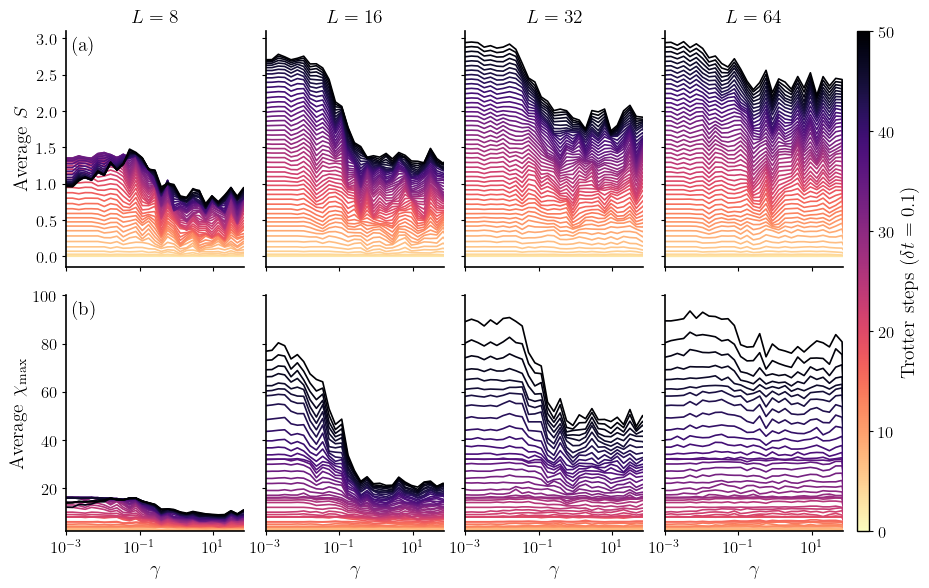

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
from matplotlib.ticker import ScalarFormatter
import pickle

# --- Figure style for Nature Physics ---
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
    "axes.labelsize": 14,
    "font.size": 13,
    "axes.titlesize": 14,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "axes.linewidth": 1.2,
    "xtick.direction": "out",
    "ytick.direction": "out",
    "lines.linewidth": 1.2,
    "legend.fontsize": 11,
    "figure.figsize": (12, 6.5)
})

# --- System sizes and gamma values ---
system_sizes = [8, 16, 32, 64]
gammas = np.logspace(-3, 2, 30)

# --- Create subplots: 2 rows (entropy, max bond), 4 columns (L values) ---
fig, axes = plt.subplots(2, len(system_sizes), sharex='col', sharey='row',
                         gridspec_kw={'hspace': 0.12, 'wspace': 0.12})

# --- Loop over observables and system sizes ---
for row_type, observable_name, ylabel in zip(
    [0, 1], ["entropy", "max_bond"], [r"Average $S$", r"Average $\chi_{\mathrm{max}}$"]
):
    for idx, L in enumerate(system_sizes):
        ax = axes[row_type, idx]
        filename = f"cost_{L}.pickle"

        with open(filename, 'rb') as f:
            data = pickle.load(f)

        # --- Extract relevant data ---
        results = []
        for gamma in data:
            for observable in gamma:
                if observable.gate.name == observable_name:
                    results.append(observable.results)

        results = np.array(results).T
        num_curves = len(results)

        # --- Set colormap per observable ---
        cmap = plt.get_cmap('magma_r' if observable_name == "max_bond" else 'magma_r')
        norm = mcolors.Normalize(vmin=0, vmax=num_curves - 1)
        colors = cmap(np.linspace(0, 1, num_curves))

        # --- Plot each curve ---
        for j in range(num_curves):
            ax.plot(gammas, results[j], color=colors[j])

        # --- Axis styling ---
        ax.set_xscale('log')
        ax.set_xlim(1e-3, 7e1)

        if observable_name == "max_bond":
            ax.set_ylim(2, 100)
        if row_type == 0:
            ax.set_title(rf"$L = {L}$")
        if idx == 0:
            ax.set_ylabel(ylabel)
        if row_type == 1:
            ax.set_xlabel(r"$\gamma$")

        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        # ax.xaxis.set_major_formatter(ScalarFormatter())
        ax.tick_params(axis='both', which='both', length=3)

# --- Add subpanel labels for rows ---
axes[0, 0].text(0.03, 0.98, "(a)", transform=axes[0, 0].transAxes,
                fontsize=14, fontweight='bold', va='top', ha='left')
axes[1, 0].text(0.03, 0.98, "(b)", transform=axes[1, 0].transAxes,
                fontsize=14, fontweight='bold', va='top', ha='left')

# --- Shared colorbar ---
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

cbar = fig.colorbar(sm, ax=axes.ravel().tolist(), pad=0.015, aspect=40)
cbar.set_label('Trotter steps ($\\delta t = 0.1$)', labelpad=4)
cbar.ax.tick_params(length=3, direction='out')
cbar.outline.set_linewidth(1.0)

# --- Save and show ---
plt.savefig("results.pdf", bbox_inches='tight', dpi=300)
plt.show()
